# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [1]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

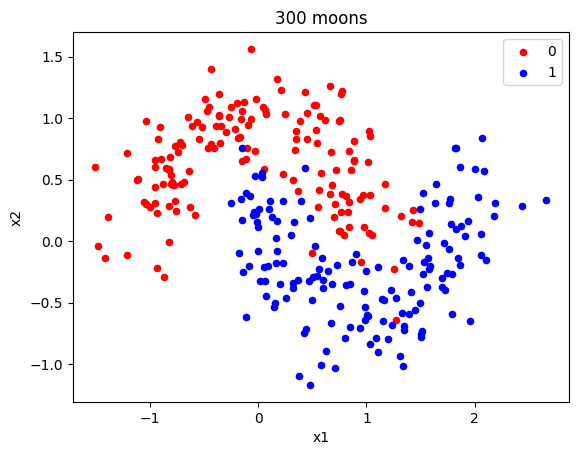

In [2]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [3]:
import numpy as np

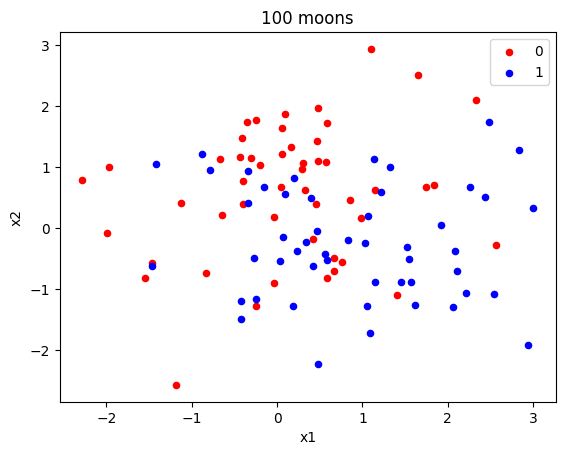

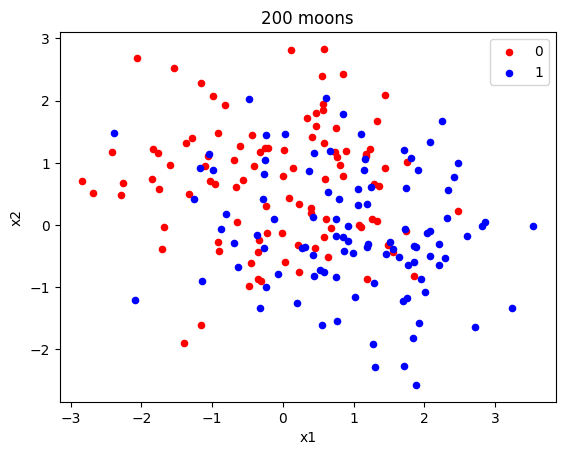

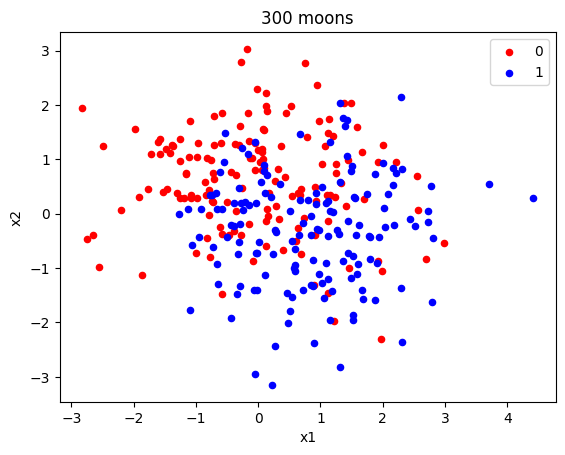

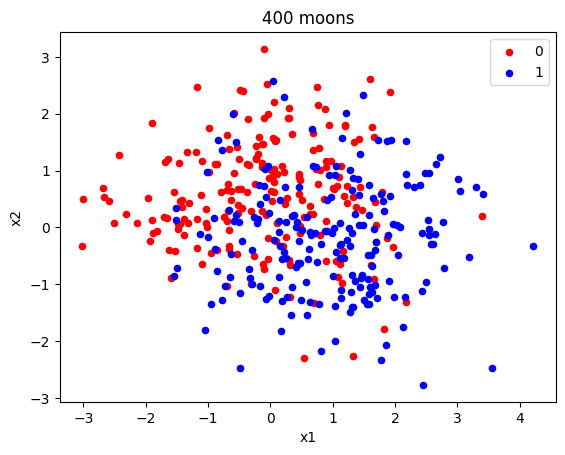

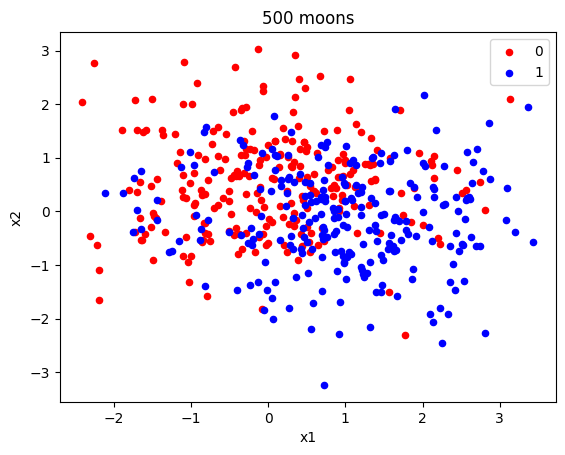

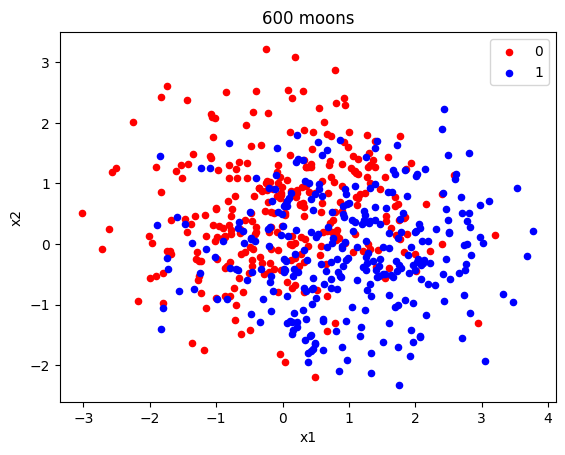

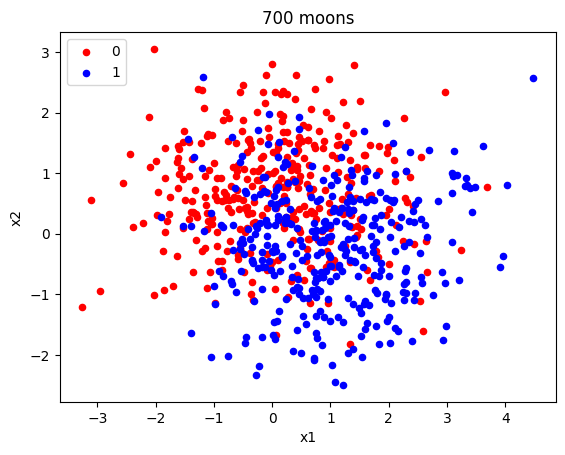

In [7]:
moons = [100,200,300,400,500,600,700]

for moon in moons:
    X, y = make_moons(n_samples=moon, noise=0.9, random_state=0)
    plot_moons(X,y)    

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [47]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [51]:
from tensorflow.keras import models, layers

In [52]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    model = models.Sequential()
    model.add(layers.Dense(5, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
        
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [54]:
model = initialize_model()

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size = 8, verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7990 - accuracy: 0.4800
Epoch 2/100
22/22 [==============================] - 0s 859us/step - loss: 0.7747 - accuracy: 0.4800
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7527 - accuracy: 0.4800
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7310 - accuracy: 0.4571
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7111 - accuracy: 0.4400
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.4343
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6721 - accuracy: 0.4914
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.5314
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6057
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6686
Epoch 1

22/22 [==============================] - 0s 1ms/step - loss: 0.3022 - accuracy: 0.8457
Epoch 83/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8457
Epoch 84/100
22/22 [==============================] - 0s 996us/step - loss: 0.3017 - accuracy: 0.8457
Epoch 85/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.8457
Epoch 86/100
22/22 [==============================] - 0s 964us/step - loss: 0.3008 - accuracy: 0.8457
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8457
Epoch 88/100
22/22 [==============================] - 0s 983us/step - loss: 0.3002 - accuracy: 0.8514
Epoch 89/100
22/22 [==============================] - 0s 981us/step - loss: 0.3001 - accuracy: 0.8457
Epoch 90/100
22/22 [==============================] - 0s 924us/step - loss: 0.2996 - accuracy: 0.8514
Epoch 91/100
22/22 [==============================] - 0s 969us/step - loss: 0.2993 - accuracy: 0.8571
E

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [56]:
history.history

{'loss': [0.7990328669548035,
  0.7747007608413696,
  0.7527408003807068,
  0.7310411930084229,
  0.7110738754272461,
  0.6907130479812622,
  0.6720929145812988,
  0.6537948846817017,
  0.6362668871879578,
  0.6191157102584839,
  0.6021127104759216,
  0.5850303769111633,
  0.5688965916633606,
  0.5535417199134827,
  0.5389872193336487,
  0.5250338912010193,
  0.5117998719215393,
  0.4996441602706909,
  0.4875730574131012,
  0.4763990044593811,
  0.46569275856018066,
  0.45590490102767944,
  0.44641271233558655,
  0.4380926191806793,
  0.4296136796474457,
  0.42189306020736694,
  0.41453635692596436,
  0.4075722396373749,
  0.4013870358467102,
  0.3953140676021576,
  0.3898187279701233,
  0.38458555936813354,
  0.3796921670436859,
  0.3750455677509308,
  0.37088248133659363,
  0.3666951060295105,
  0.3631035387516022,
  0.3599391579627991,
  0.35615211725234985,
  0.3531026244163513,
  0.3502832353115082,
  0.3474850654602051,
  0.34488528966903687,
  0.3424994647502899,
  0.34024077653

❓ Plot the history of the train loss using the following function ❓

In [57]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

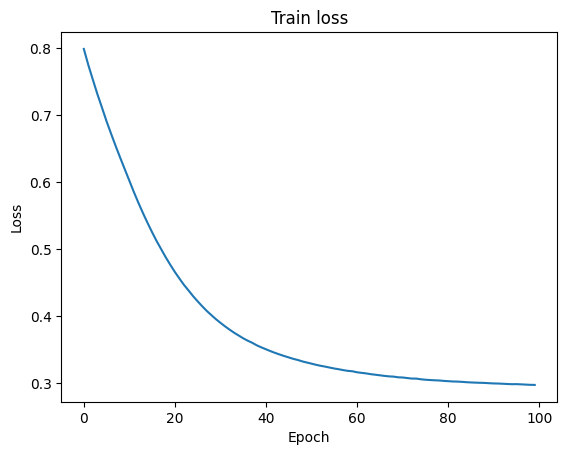

In [58]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [59]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 1ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [62]:
res = model.evaluate(X_test, y_test, verbose=0)

res

[0.2919061481952667, 0.8266666531562805]

In [63]:
loss = res[0]
accuracy = res[1]

**🧪 Test your code**

In [64]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [65]:
from utils.plots import plot_decision_regions

1940/1940 [==============================] - 1s 581us/step


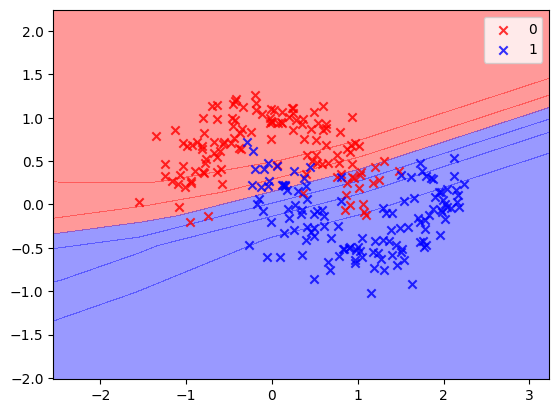

In [66]:
plot_decision_regions(X,y,model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [67]:
model = initialize_model()

In [68]:
history = model.fit(X_train, y_train, epochs=500, batch_size = 8, verbose=1)

Epoch 1/500
22/22 [==============================] - 0s 1ms/step - loss: 0.8522 - accuracy: 0.4229
Epoch 2/500
22/22 [==============================] - 0s 938us/step - loss: 0.8238 - accuracy: 0.5029
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.8015 - accuracy: 0.5200
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7806 - accuracy: 0.5257
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7632 - accuracy: 0.5257
Epoch 6/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7470 - accuracy: 0.5257
Epoch 7/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7316 - accuracy: 0.5314
Epoch 8/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.5543
Epoch 9/500
22/22 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5486
Epoch 10/500
22/22 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5486
Epoch 1

Epoch 83/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8400
Epoch 84/500
22/22 [==============================] - 0s 970us/step - loss: 0.3253 - accuracy: 0.8400
Epoch 85/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8400
Epoch 86/500
22/22 [==============================] - 0s 910us/step - loss: 0.3212 - accuracy: 0.8400
Epoch 87/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.8400
Epoch 88/500
22/22 [==============================] - 0s 968us/step - loss: 0.3171 - accuracy: 0.8457
Epoch 89/500
22/22 [==============================] - 0s 966us/step - loss: 0.3155 - accuracy: 0.8457
Epoch 90/500
22/22 [==============================] - 0s 917us/step - loss: 0.3137 - accuracy: 0.8457
Epoch 91/500
22/22 [==============================] - 0s 936us/step - loss: 0.3123 - accuracy: 0.8457
Epoch 92/500
22/22 [==============================] - 0s 911us/step - loss: 0.3107 - acc

22/22 [==============================] - 0s 897us/step - loss: 0.2569 - accuracy: 0.8857
Epoch 163/500
22/22 [==============================] - 0s 950us/step - loss: 0.2567 - accuracy: 0.8857
Epoch 164/500
22/22 [==============================] - 0s 911us/step - loss: 0.2562 - accuracy: 0.8857
Epoch 165/500
22/22 [==============================] - 0s 875us/step - loss: 0.2557 - accuracy: 0.8857
Epoch 166/500
22/22 [==============================] - 0s 840us/step - loss: 0.2555 - accuracy: 0.8800
Epoch 167/500
22/22 [==============================] - 0s 845us/step - loss: 0.2550 - accuracy: 0.8800
Epoch 168/500
22/22 [==============================] - 0s 856us/step - loss: 0.2547 - accuracy: 0.8800
Epoch 169/500
22/22 [==============================] - 0s 876us/step - loss: 0.2542 - accuracy: 0.8800
Epoch 170/500
22/22 [==============================] - 0s 894us/step - loss: 0.2539 - accuracy: 0.8800
Epoch 171/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2536 - acc

22/22 [==============================] - 0s 865us/step - loss: 0.2379 - accuracy: 0.8914
Epoch 242/500
22/22 [==============================] - 0s 896us/step - loss: 0.2380 - accuracy: 0.8914
Epoch 243/500
22/22 [==============================] - 0s 914us/step - loss: 0.2375 - accuracy: 0.8971
Epoch 244/500
22/22 [==============================] - 0s 867us/step - loss: 0.2373 - accuracy: 0.8914
Epoch 245/500
22/22 [==============================] - 0s 834us/step - loss: 0.2373 - accuracy: 0.8971
Epoch 246/500
22/22 [==============================] - 0s 800us/step - loss: 0.2371 - accuracy: 0.8971
Epoch 247/500
22/22 [==============================] - 0s 827us/step - loss: 0.2370 - accuracy: 0.8914
Epoch 248/500
22/22 [==============================] - 0s 852us/step - loss: 0.2369 - accuracy: 0.8971
Epoch 249/500
22/22 [==============================] - 0s 846us/step - loss: 0.2368 - accuracy: 0.8971
Epoch 250/500
22/22 [==============================] - 0s 899us/step - loss: 0.2367 - a

22/22 [==============================] - 0s 852us/step - loss: 0.2310 - accuracy: 0.9143
Epoch 321/500
22/22 [==============================] - 0s 808us/step - loss: 0.2307 - accuracy: 0.9143
Epoch 322/500
22/22 [==============================] - 0s 852us/step - loss: 0.2306 - accuracy: 0.9143
Epoch 323/500
22/22 [==============================] - 0s 920us/step - loss: 0.2307 - accuracy: 0.9143
Epoch 324/500
22/22 [==============================] - 0s 877us/step - loss: 0.2305 - accuracy: 0.9143
Epoch 325/500
22/22 [==============================] - 0s 881us/step - loss: 0.2305 - accuracy: 0.9143
Epoch 326/500
22/22 [==============================] - 0s 900us/step - loss: 0.2306 - accuracy: 0.9143
Epoch 327/500
22/22 [==============================] - 0s 839us/step - loss: 0.2304 - accuracy: 0.9143
Epoch 328/500
22/22 [==============================] - 0s 868us/step - loss: 0.2304 - accuracy: 0.9143
Epoch 329/500
22/22 [==============================] - 0s 845us/step - loss: 0.2305 - a

22/22 [==============================] - 0s 862us/step - loss: 0.2275 - accuracy: 0.9143
Epoch 400/500
22/22 [==============================] - 0s 865us/step - loss: 0.2274 - accuracy: 0.9143
Epoch 401/500
22/22 [==============================] - 0s 877us/step - loss: 0.2272 - accuracy: 0.9143
Epoch 402/500
22/22 [==============================] - 0s 888us/step - loss: 0.2273 - accuracy: 0.9143
Epoch 403/500
22/22 [==============================] - 0s 863us/step - loss: 0.2271 - accuracy: 0.9143
Epoch 404/500
22/22 [==============================] - 0s 854us/step - loss: 0.2272 - accuracy: 0.9143
Epoch 405/500
22/22 [==============================] - 0s 878us/step - loss: 0.2270 - accuracy: 0.9143
Epoch 406/500
22/22 [==============================] - 0s 844us/step - loss: 0.2271 - accuracy: 0.9143
Epoch 407/500
22/22 [==============================] - 0s 837us/step - loss: 0.2271 - accuracy: 0.9143
Epoch 408/500
22/22 [==============================] - 0s 857us/step - loss: 0.2272 - a

22/22 [==============================] - 0s 870us/step - loss: 0.2251 - accuracy: 0.9143
Epoch 479/500
22/22 [==============================] - 0s 902us/step - loss: 0.2252 - accuracy: 0.9143
Epoch 480/500
22/22 [==============================] - 0s 903us/step - loss: 0.2252 - accuracy: 0.9143
Epoch 481/500
22/22 [==============================] - 0s 911us/step - loss: 0.2250 - accuracy: 0.9143
Epoch 482/500
22/22 [==============================] - 0s 877us/step - loss: 0.2249 - accuracy: 0.9143
Epoch 483/500
22/22 [==============================] - 0s 867us/step - loss: 0.2251 - accuracy: 0.9143
Epoch 484/500
22/22 [==============================] - 0s 873us/step - loss: 0.2253 - accuracy: 0.9143
Epoch 485/500
22/22 [==============================] - 0s 876us/step - loss: 0.2249 - accuracy: 0.9143
Epoch 486/500
22/22 [==============================] - 0s 854us/step - loss: 0.2252 - accuracy: 0.9143
Epoch 487/500
22/22 [==============================] - 0s 849us/step - loss: 0.2249 - a

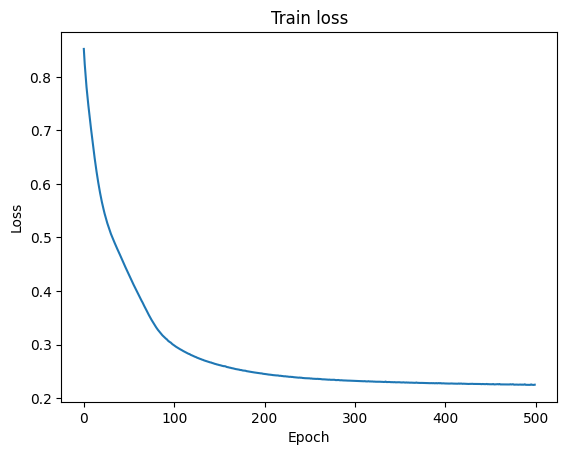

In [69]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [70]:
res = model.evaluate(X_test, y_test, verbose=0)
res

[0.26912128925323486, 0.8533333539962769]

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [78]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()
    
    model.add(layers.Dense(20, input_dim=2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

In [79]:
model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [80]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 20)                60        
                                                                 
 dense_23 (Dense)            (None, 10)                210       
                                                                 
 dense_24 (Dense)            (None, 5)                 55        
                                                                 
 dense_25 (Dense)            (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [81]:
model = initialize_model_2()

history = model.fit(
            X_train, y_train,
            epochs=500,
            batch_size=8,
            verbose=0)

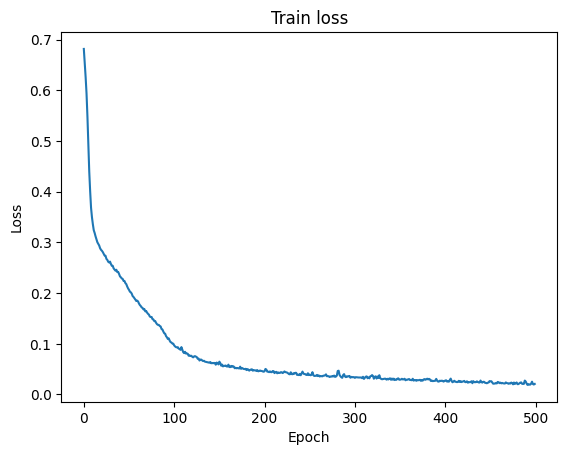

In [82]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [87]:
res = model.evaluate(X_test, y_test)
res[1]

3/3 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.9200


0.9200000166893005

In [88]:
accuracy_deep = res[1]

🧪 **Test your code**

In [89]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1940/1940 [==============================] - 1s 582us/step


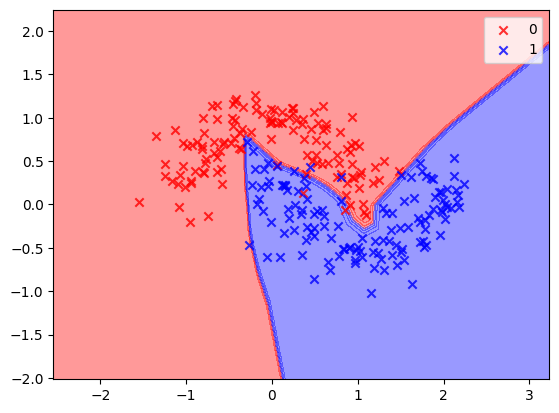

In [90]:
plot_decision_regions(X,y,model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!